In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 1. 데이터를 로드하시오 

In [2]:
import pandas as pd 
data = pd.read_csv('/content/drive/My Drive/data/dataset/test13.csv')

In [3]:
data.head()

,height,weight,label
0,186,47,thin
1,143,74,fat
2,144,55,fat
3,173,60,normal
4,170,74,fat


# 2. 트레인, 테스트로 나누어 보세요. 

In [4]:
X = data.iloc[:, :2]
y_obj  = data['label']
y_target = data['label'].unique()

In [5]:
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(y_obj)
y = e.transform(y_obj)

In [6]:
from keras.utils.np_utils import to_categorical
Y_encoded = to_categorical(y)

Using TensorFlow backend.


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, random_state = 1, train_size = 0.8)

# 3. 딥러닝 모델을 업데이트 하고, 베스트 모델을 만들어보자.

* label 값 인코딩 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)
model = Sequential()
model.add(Dense(500, input_dim = 2, activation = 'relu'))

model.add(Dense(3, activation='softmax'))
model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history = model.fit(X_train,Y_train, validation_data=(X_test, Y_test), epochs = 30, batch_size = 20)

Epoch 1/30
800/800 [==============================] - 3s 4ms/step - loss: 0.5924 - accuracy: 0.7398 - val_loss: 0.4991 - val_accuracy: 0.7535
Epoch 2/30
800/800 [==============================] - 3s 4ms/step - loss: 0.5096 - accuracy: 0.7695 - val_loss: 0.4003 - val_accuracy: 0.7995
Epoch 3/30
800/800 [==============================] - 3s 3ms/step - loss: 0.4632 - accuracy: 0.7836 - val_loss: 0.4003 - val_accuracy: 0.8015
Epoch 4/30
800/800 [==============================] - 3s 4ms/step - loss: 0.4112 - accuracy: 0.8094 - val_loss: 0.3599 - val_accuracy: 0.8270
Epoch 5/30
800/800 [==============================] - 3s 4ms/step - loss: 0.3374 - accuracy: 0.8436 - val_loss: 0.3831 - val_accuracy: 0.8148
Epoch 6/30
800/800 [==============================] - 3s 4ms/step - loss: 0.2845 - accuracy: 0.8720 - val_loss: 0.2604 - val_accuracy: 0.8802
Epoch 7/30
800/800 [==============================] - 3s 3ms/step - loss: 0.2459 - accuracy: 0.8940 - val_loss: 0.1875 - val_accuracy: 0.9260
Epoch 

#4. 그래프로 확인해보세요

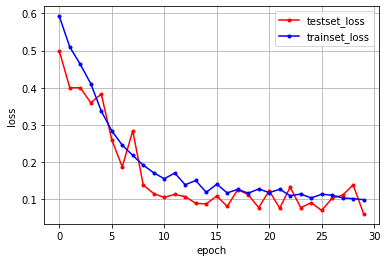

In [9]:
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']

#학습셋의 오차 
y_loss = history.history['loss']

#그래프로 ㅠㅛ현
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'trainset_loss')

#그래프에 그리드를 주고 레이블 표시 
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 5. 학습의 자동 중단을 적절하게 설정해보세요. 

In [10]:
import os 
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'

checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose = 1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=200, batch_size = 50, verbose = 0,
                    callbacks = [early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.06896, saving model to ./model/01-0.0690.hdf5

Epoch 00002: val_loss did not improve from 0.06896

Epoch 00003: val_loss improved from 0.06896 to 0.05978, saving model to ./model/03-0.0598.hdf5

Epoch 00004: val_loss did not improve from 0.05978

Epoch 00005: val_loss improved from 0.05978 to 0.05556, saving model to ./model/05-0.0556.hdf5

Epoch 00006: val_loss did not improve from 0.05556

Epoch 00007: val_loss did not improve from 0.05556

Epoch 00008: val_loss did not improve from 0.05556

Epoch 00009: val_loss did not improve from 0.05556

Epoch 00010: val_loss did not improve from 0.05556

Epoch 00011: val_loss did not improve from 0.05556

Epoch 00012: val_loss improved from 0.05556 to 0.05384, saving model to ./model/12-0.0538.hdf5

Epoch 00013: val_loss did not improve from 0.05384

Epoch 00014: val_loss improved from 0.05384 to 0.05237, saving model to ./model/14-0.0524.hdf5

Epoch 00015: val_loss improved from 0.05237 to 0.04758,

In [11]:
print('Train Accuracy : %.4f'%(model.evaluate(X_train,Y_train)[1]))
print('test Accuracy : %.4f'%(model.evaluate(X_test, Y_test)[1]))

500/500 [==============================] - 1s 2ms/step - loss: 0.0455 - accuracy: 0.9873
Train Accuracy : 0.9873
125/125 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9860
test Accuracy : 0.9860


# 6. 학습된 결과를 이용해 아래 1), 2)의 비만도를 예측해보세요. 



In [12]:
test1 = pd.DataFrame(columns=X_train.columns)
test1['height'] = [170,164]
test1['weight'] = [45, 80]
result = model.predict(test1)
test1['Label'] = np.unique(y_obj)[model.predict_classes(test1,verbose=0)]
test1['Prediction_Result'] = list(result[i].max() for i in range(len(result)))
test1['Result_detail'] = list(result[i] for i in range(len(result)))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [13]:
test1

,height,weight,Label,Prediction_Result,Result_detail
0,170,45,thin,0.999994,"[1.6142327e-24, 6.0836182e-06, 0.9999939]"
1,164,80,fat,0.999996,"[0.99999607, 3.909374e-06, 2.7391957e-21]"


In [15]:
 for i in test1.index: 
  print('%d) 키:%d, 몸무게: %d일 경우의 비만도 : %s, 예측율 : %f'%(i+1, test1.loc[i]['height'], 
                                                      test1.loc[i]['weight'], 
                                                      test1.loc[i]['Label'],
                                                      test1.loc[i]['Prediction_Result']))

1) 키:170, 몸무게: 45일 경우의 비만도 : thin, 예측율 : 0.999994
2) 키:164, 몸무게: 80일 경우의 비만도 : fat, 예측율 : 0.999996
